# Dirichlet Kernel
**DEFINITION.** Let the *Dirichlet* kernel be defined as the following function:
$$
D_n(x):=\sum_{|N|\leq n} e^{inx}
$$
And let $D(x)$ denote its limit:
$$
D(x):=\lim_n \sum_{|N|\leq n} e^{inx} = \sum_{|n|}e^{inx}
$$

**THEOREM.** For all $n \in \mathbb N$, the Dirichlet kernel can be written as the following explicit function:
$$
D_n(x)=\frac{\sin{((n+1/2)}x)}{\sin{(x/2)}}
$$

Let us visualize the theorem with MatplotLib.

In [1]:
import warnings
warnings.simplefilter("ignore")


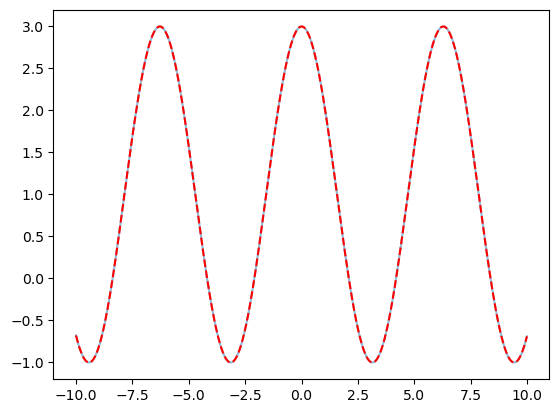

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n = 1 # Fixed n

def explicit(n, x):
    return (np.sin((n+.5)*x))/(np.sin(.5*x))

def dirichlet(n, x):
    s = 0
    for i in range(-n, n+1):
        xi = i*x
        s += np.exp(complex(0, xi))

    return s
    
X = np.arange(-10, 10, .01)
y_explicit = explicit(n, X)

def calculate_dirichlet(n, X):
    y_dirichlet = []
    for x in X:
        y_dirichlet.append(dirichlet(n,x))
    return y_dirichlet

y_dirichlet = calculate_dirichlet(1, X)

fig, ax = plt.subplots()

ax.plot(X,y_explicit, alpha=.5)
ax.plot(X, y_dirichlet, color="r", linestyle="--")


As you can see, they are practically the same. Now let us visualize something even more interesting.

**THEOREM.** The Dirichlet kernel converges to the following $\pi$-periodic extension of the Dirichlet comb:
$$
\lim_n D_n(x) = \delta_{(k\pi)_{k \in \mathbb Z}}(x)
$$

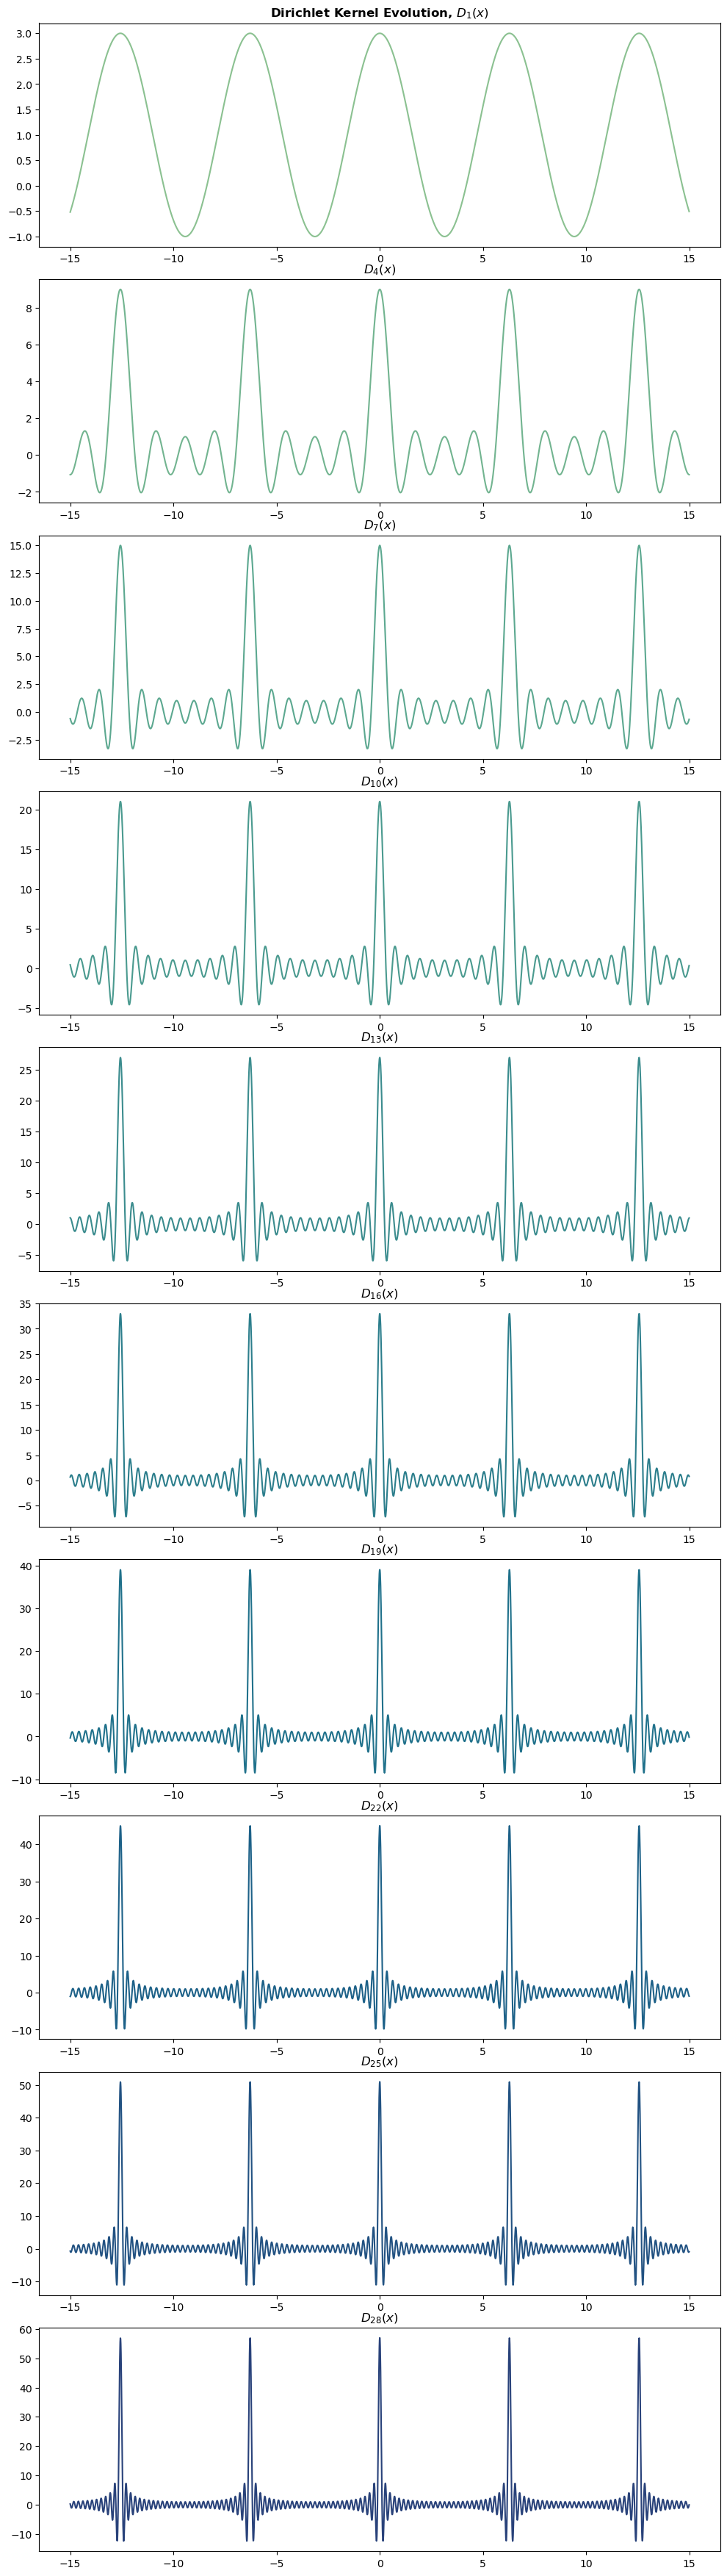

In [12]:
k = 10

my_palette = sns.color_palette("crest", k)
X = np.arange(-15, 15, .01)

fig, axes = plt.subplots(k, 1, figsize=(10, 35))

fig.tight_layout() 

lambda_ = 3
for i in range(0, k):
    j = i*lambda_+1
    y_j = explicit(j, X)
    sns.lineplot(x = X, y = y_j, color = my_palette[i], ax = axes[i])
    if i != 0:
        axes[i].set_title("$D_{{ {0} }}(x)$".format(j))
    else:
        axes[i].set_title(f"Dirichlet Kernel Evolution, $D_{1}(x)$", fontweight="bold")

plt.savefig("Dirichlet.png")